In [ ]:
'''
датасет о сотрудниках по которому создается прогнозная модель увольнений

Что интересно:
- наличие пропусков
- распределение сотрудников по возрасту, полу, образованию
- оценить уникальные значения признаков
- заменить категориальные признаки на int's

Какие графики построить:
- построить матрицу корреляции признаков
- столбчатая диаграмма распределения приема по полу
- динамика приема в разрезе пола (линейный)
- 

Для количественных признаков
- гистограммы (hist, barlplot, plot)
- линейные
- точечные (scatterplot, sns.jointplot
- ящик c усами (plt.boxplot, df.plot(kind='box'), sns.boxplot)

Для Качественных признаков

'''

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [3]:
data = pd.read_csv('Employee.csv')

In [6]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [7]:
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [11]:
data.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

<Axes: xlabel='JoiningYear'>

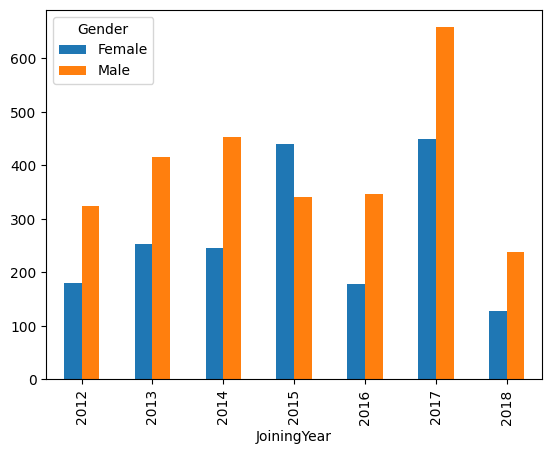

In [12]:
# gender distribution
data.groupby('JoiningYear')['Gender'].value_counts()\
    .unstack(fill_value=0)\
    .plot(kind='bar')

<Axes: >

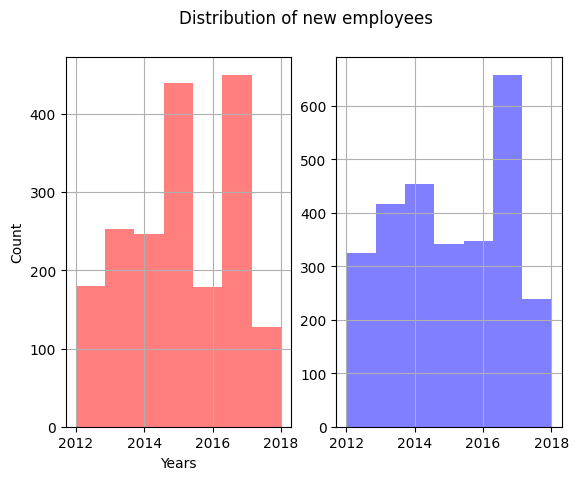

In [124]:
plt.subplot(121) # 1 row | 2 cols | current ax

plt.suptitle('Distribution of new employees')
data[data.Gender=='Female'].JoiningYear.hist(density=False, bins=data.JoiningYear.nunique(), color='r', alpha=0.5)
plt.xlabel('Years')
plt.ylabel('Count')

plt.subplot(122) # 1 row | 2 cols | current ax
data[data.Gender=='Male'].JoiningYear.hist(density=False, bins=data.JoiningYear.nunique(), color='b', alpha=0.5)



<Axes: >

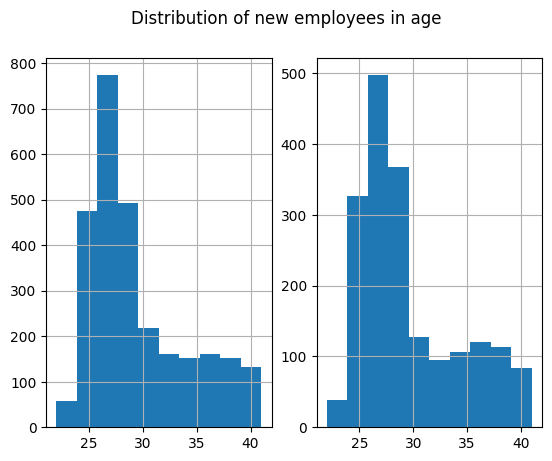

In [18]:
# distribution of Age
plt.subplot(121) # 1 row | 2 cols | current ax
plt.suptitle('Distribution of new employees in age')
data[data.Gender=='Male'].Age.hist()
plt.subplot(122) # 1 row | 2 cols | current ax
data[data.Gender=='Female'].Age.hist()

Text(0.5, 0, 'Male')

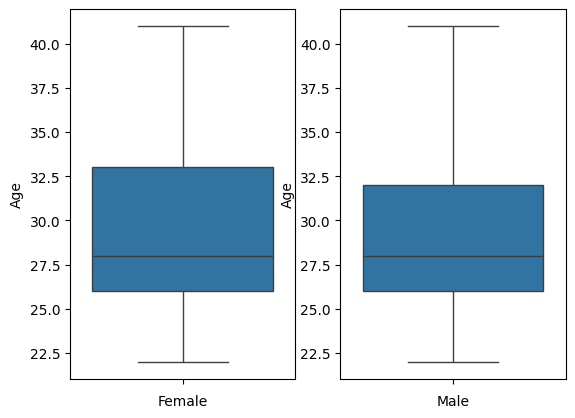

In [23]:
#plt.boxplot(data.Age)
#data.Age.plot(kind='box')
plt.subplot(121)
sns.boxplot(data[data.Gender=='Female'].Age)
plt.xlabel('Female')
plt.subplot(122)
sns.boxplot(data[data.Gender=='Male'].Age)
plt.xlabel('Male')

In [136]:
# cleaning Age
data.loc[data.Age>37, 'Age']=data.Age.median()

In [138]:
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,28,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


<Axes: ylabel='Age'>

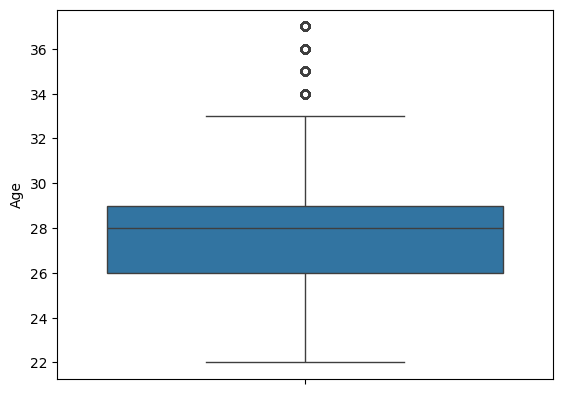

In [141]:
sns.boxplot(data.Age)

<Axes: xlabel='Education,City'>

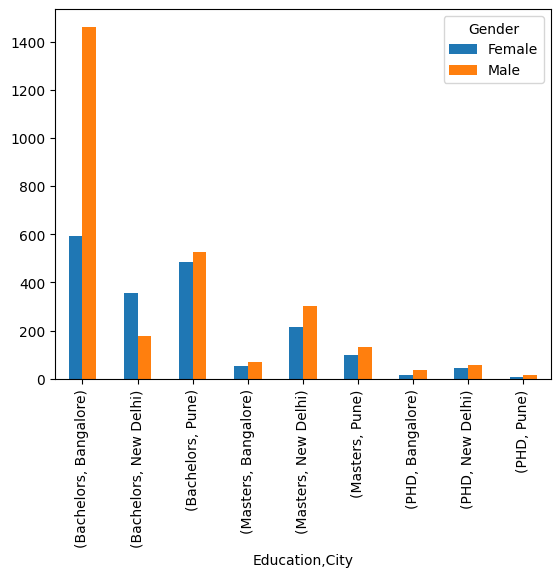

In [37]:
# gender distribution
data.groupby(['Education','City'])['Gender'].value_counts()\
    .unstack(fill_value=0)\
    .plot(kind='bar')